In [1]:
import sys
sys.path.append('/Users/yuch8913/miniforge3/envs/er3t_env/lib/python3.8/site-packages')
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from glob import glob
import numpy as np
from sys import exit as ext
import copy
from bisect import bisect_left
from oco_post_class_ywc import *
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
import geopy.distance
import xarray as xr
import seaborn as sns
from tool_code import *
%matplotlib inline
import os, pickle 
import metpy
#"""

from matplotlib import font_manager

font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#"""

import warnings
warnings.filterwarnings("ignore")

In [2]:
f =  h5py.File('../simulation/data/20181018_central_asia_2_470cloud_test2_20181018/zpt.h5')

In [3]:
f.keys()

<KeysViewHDF5 ['d_co2_lay', 'd_h2o_lay', 'd_o2_lay', 'dz', 'h2o_vmr', 'h_edge', 'h_lay', 'p_edge', 'p_lay', 't_edge', 't_lay', 'u_lay', 'v_lay']>

In [27]:
dewT = np.array(metpy.calc.dewpoint(f['h2o_vmr'][...]*f['p_lay'][...] * units.hPa)* units.K)

In [26]:
np.array(dewT)

array([273.95898022, 273.24281009, 272.56518338, 271.92176878,
       271.36675718, 270.08214153, 264.44267122, 259.74017971,
       252.87542204, 245.38480789, 238.13048926, 232.99320908,
       228.53132025, 225.4961047 , 223.28595979, 221.71610725,
       221.11296582, 218.77640594, 218.18035065, 215.03068843,
       210.11752642, 207.67719133, 203.03721169, 199.15511866,
       188.25301033, 182.27999071, 178.32142226, 174.92293251,
       171.72044494])

In [13]:
f['p_lay'][...]

array([906.11508608, 862.38735608, 820.19541619, 779.43898316,
       740.26895259, 702.76161076, 666.78237218, 632.40035491,
       599.42761564, 567.80448792, 534.74631172, 500.606176  ,
       468.21627791, 437.56432715, 408.565857  , 381.14058072,
       355.17067218, 330.6757447 , 307.72662991, 285.62007726,
       255.15847394, 218.56958302, 186.49983642, 158.92612672,
        89.93756225,  36.6897818 ,  16.95043876,   8.03328446,
         3.90385105])

In [6]:
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

In [33]:
units('m/s')

1.0 <Unit('meter / second')>

In [40]:
wind_dir = metpy.calc.wind_direction(f['u_lay'][...]*units('m/s'), f['v_lay'][...]*units('m/s'))
wind_speed = metpy.calc.wind_speed(f['u_lay'][...]*units('m/s'), f['v_lay'][...]*units('m/s'))

In [42]:
wind_speed

Magnitude,[1.00152929269049 29.266003087862828 50.31803550661861 39.68234348100976 31.680837743836864 27.862114913013713 30.343589435506495 27.166207577027564 22.860754575309333 20.513566675112457 18.274332149659898 14.286731706489524 10.55829742462341 8.246118012941858 7.066364643389504 6.999084286594566 8.577974315234767 10.930803758057955 13.60884694863902 15.569135472972038 17.835453051301595 18.357396497136172 17.42976637158977 13.56702357038237 14.293122689981239 19.428852382835107 9.563015782380822 11.041370327143262 11.775718590433797]
Units,meter/second


In [43]:
p = f['p_lay'][...] * units.hPa
T = f['t_lay'][...] * units.K
Td = dewT * units.K
wind_speed = wind_speed# * units('m/s')
wind_dir = wind_dir * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

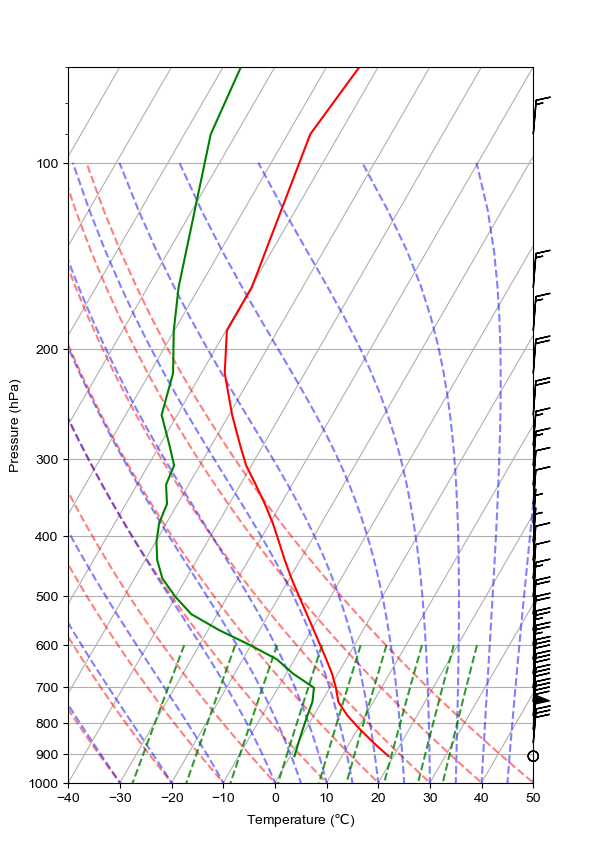

In [60]:
f = plt.figure(figsize=(6, 10))
f.tight_layout()



skew = SkewT(fig=f, aspect=120)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Set some better labels than the default
skew.ax.set_xlabel('Temperature ($\N{DEGREE CELSIUS}$)')
skew.ax.set_ylabel('Pressure (hPa)')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)


f.savefig('atm_skew_T.png', dpi=150)
plt.show()